# Basic problem-independent evaluation for whole experiment
(whole experiment = several problems, several dimensions, optionally several algorithms)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import eval

## Specify directory and data to analyse

In [2]:
# directory should contain one layer of subdirectories
directory = '../data/coco/ga/'
experiment_dict = eval.read_experiment(directory)
experiment_dict

{'f1_d10_i1/evaluations.csv':     evaluation  current_fx  best_fx
 0            1     78.2256  78.2256
 1            2     74.3476  74.3476
 2            4     64.5495  64.5495
 3            5     61.5337  61.5337
 4            9     53.6939  53.6939
 5           17     52.3896  52.3896
 6           25     51.5376  51.5376
 7           34     43.3830  43.3830
 8          101     40.7212  40.7212
 9          128     32.9034  32.9034
 10       10020    822.4040  32.9034,
 'f1_d10_i1/iterations.csv':     iteration  best_fx  diversity
 0           1  43.3830        0.0
 1          10  32.9034        0.0
 2          20  32.9034        0.0
 3          30  32.9034        0.0
 4          40  32.9034        0.0
 5          50  32.9034        0.0
 6          60  32.9034        0.0
 7          70  32.9034        0.0
 8          80  32.9034        0.0
 9          90  32.9034        0.0
 10        100  32.9034        0.0
 11        110  32.9034        0.0
 12        120  32.9034        0.0
 13     

## Calculate statistics for runs

### Iterations

In [3]:
# calculates statistics based on best_fx
stats_iter_dict = {}
for key in experiment_dict:
    if 'iteration' in key:
        stats_iter_dict[key] = eval.basic_statistics(experiment_dict[key], 'iteration') 
stats_iter_dict

{'f1_d10_i1/iterations.csv':            mean_opt  std_opt  min_opt  max_opt  median_opt
 iteration                                                 
 1           43.3830      NaN  43.3830  43.3830     43.3830
 10          32.9034      NaN  32.9034  32.9034     32.9034
 20          32.9034      NaN  32.9034  32.9034     32.9034
 30          32.9034      NaN  32.9034  32.9034     32.9034
 40          32.9034      NaN  32.9034  32.9034     32.9034
 50          32.9034      NaN  32.9034  32.9034     32.9034
 60          32.9034      NaN  32.9034  32.9034     32.9034
 70          32.9034      NaN  32.9034  32.9034     32.9034
 80          32.9034      NaN  32.9034  32.9034     32.9034
 90          32.9034      NaN  32.9034  32.9034     32.9034
 100         32.9034      NaN  32.9034  32.9034     32.9034
 110         32.9034      NaN  32.9034  32.9034     32.9034
 120         32.9034      NaN  32.9034  32.9034     32.9034
 130         32.9034      NaN  32.9034  32.9034     32.9034
 140        

### Evaluations

In [5]:
stats_eval_dict = {}
for key in experiment_dict:
    if 'evaluation' in key:
        # evaluations are logged on improvement, thus evaluation numbers differ for every run. 
        # missing data needs to be filled first (with data from previous evaluation log) to properly calculate statistics
        experiment_dict[key] = eval.add_missing_values(experiment_dict[key], 'evaluation')

        # group best_fx for each evaluation number and calculate statistics
        stats_eval_dict[key] = eval.basic_statistics(experiment_dict[key], 'evaluation')
stats_eval_dict

{'f1_d10_i1/evaluations.csv':             mean_opt  std_opt  min_opt  max_opt  median_opt
 evaluation                                                 
 1            78.2256      NaN  78.2256  78.2256     78.2256
 2            74.3476      NaN  74.3476  74.3476     74.3476
 4            64.5495      NaN  64.5495  64.5495     64.5495
 5            61.5337      NaN  61.5337  61.5337     61.5337
 9            53.6939      NaN  53.6939  53.6939     53.6939
 17           52.3896      NaN  52.3896  52.3896     52.3896
 25           51.5376      NaN  51.5376  51.5376     51.5376
 34           43.3830      NaN  43.3830  43.3830     43.3830
 101          40.7212      NaN  40.7212  40.7212     40.7212
 128          32.9034      NaN  32.9034  32.9034     32.9034
 10020        32.9034      NaN  32.9034  32.9034     32.9034,
 'f1_d20_i1/evaluations.csv':             mean_opt  std_opt   min_opt   max_opt  median_opt
 evaluation                                                   
 1           151.6460 

## Plotting

### Iterations

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


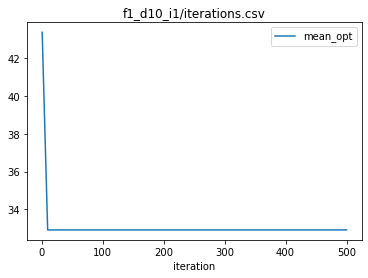

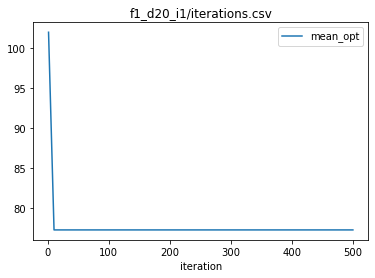

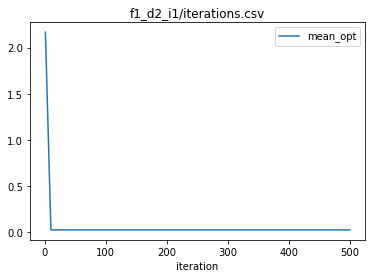

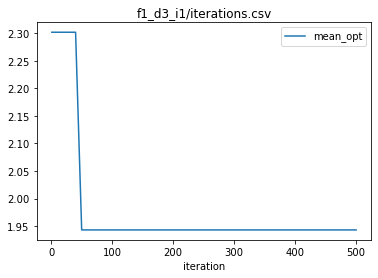

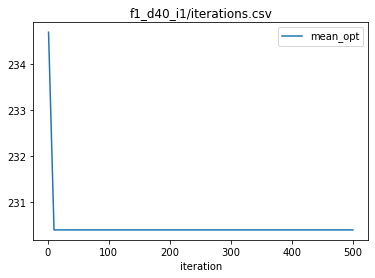

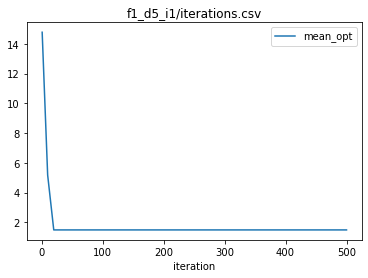

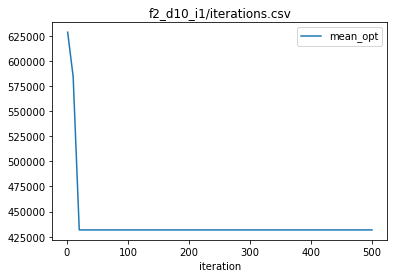

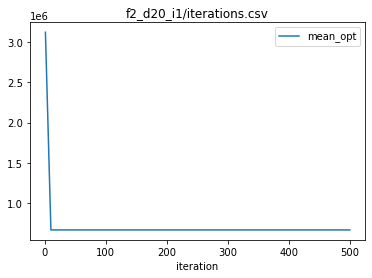

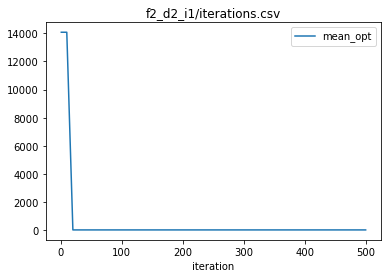

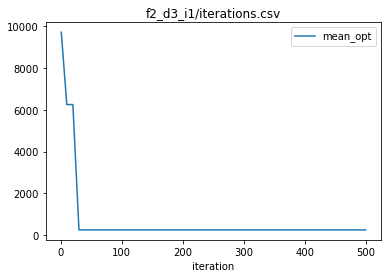

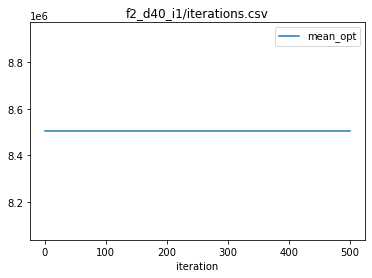

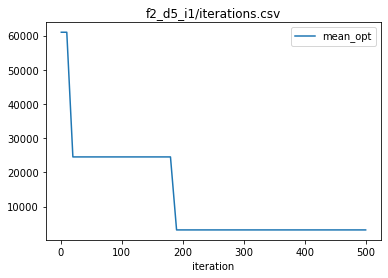

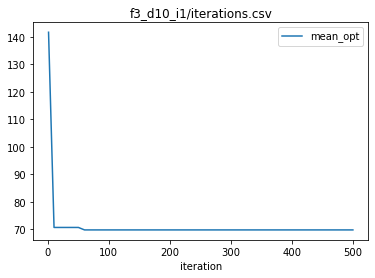

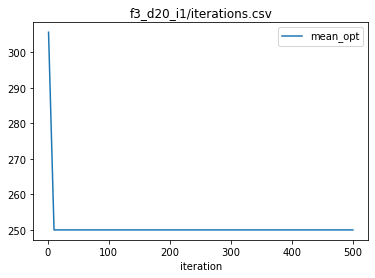

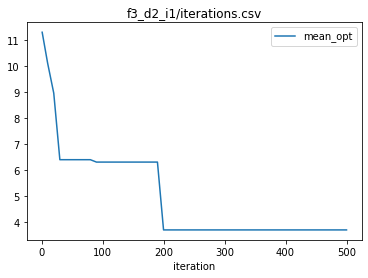

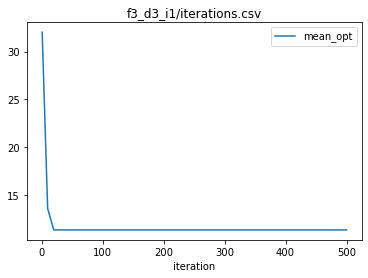

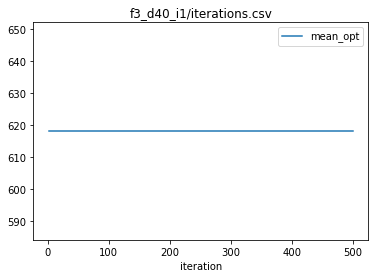

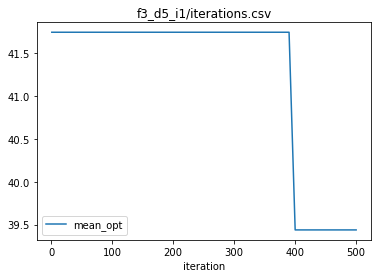

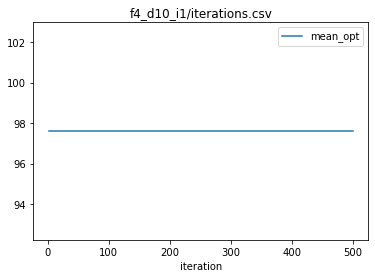

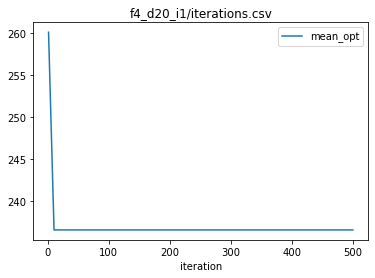

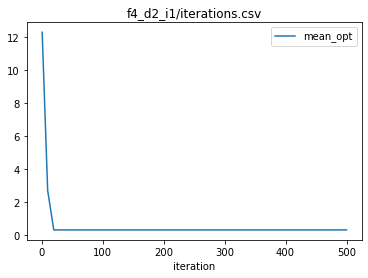

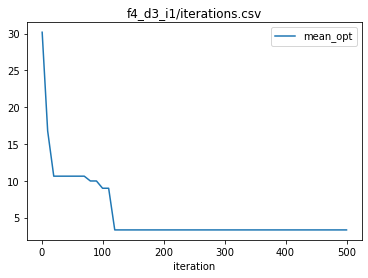

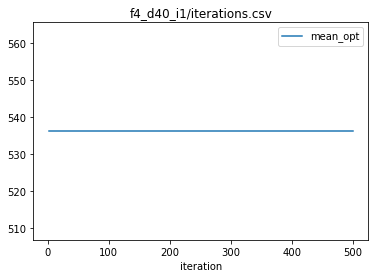

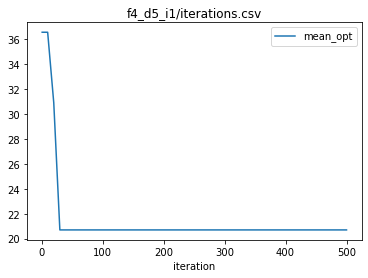

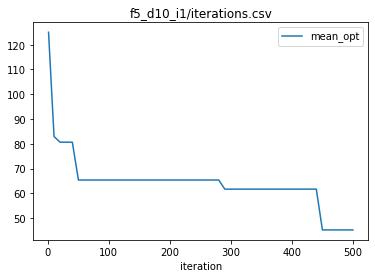

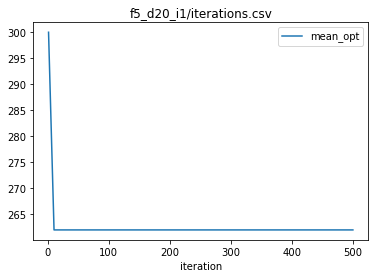

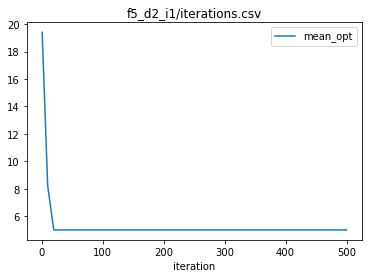

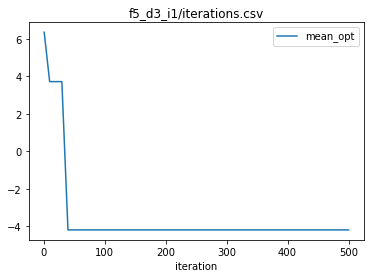

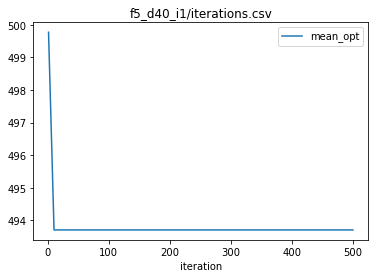

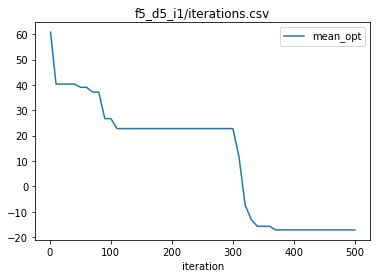

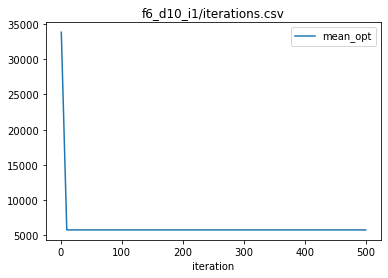

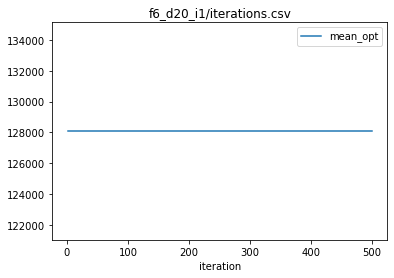

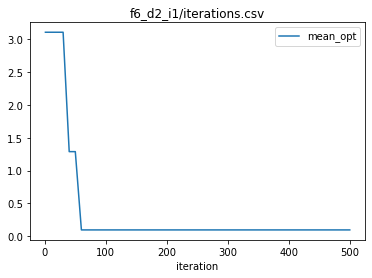

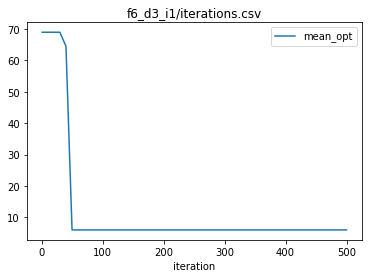

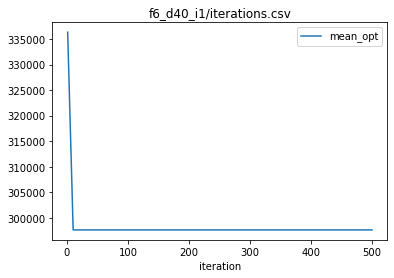

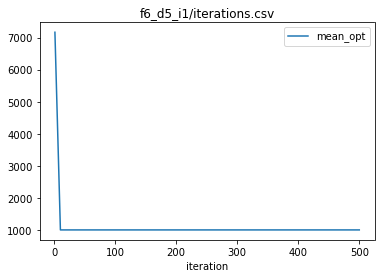

In [15]:
for key in stats_iter_dict:
    stats_iter_dict[key].plot(y="mean_opt")
    plt.title(key)

### Evaluations

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


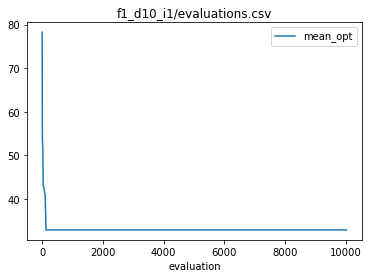

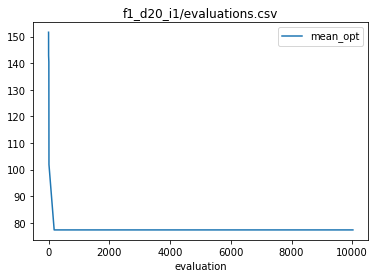

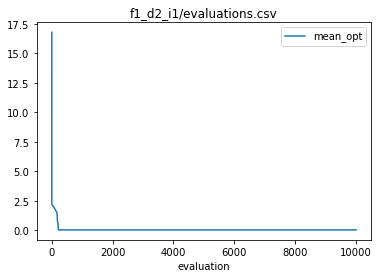

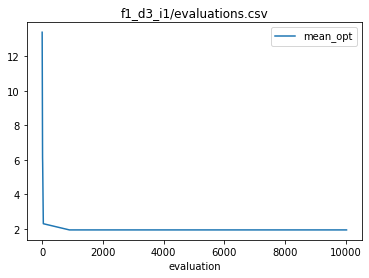

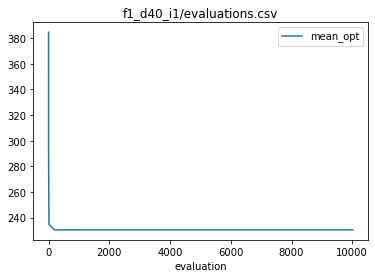

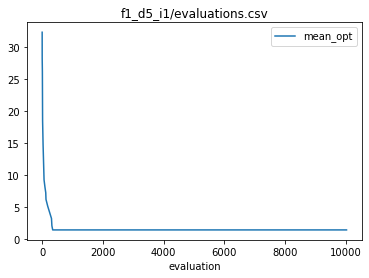

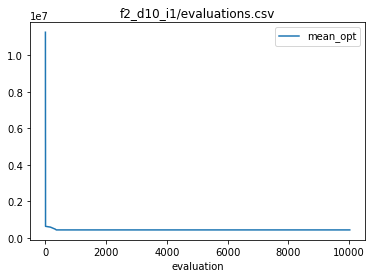

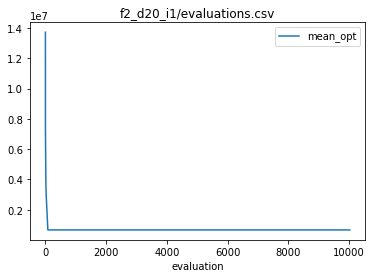

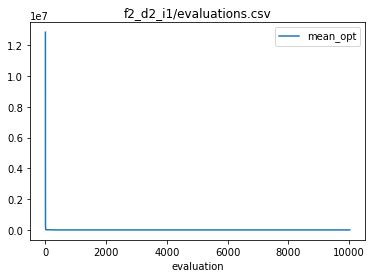

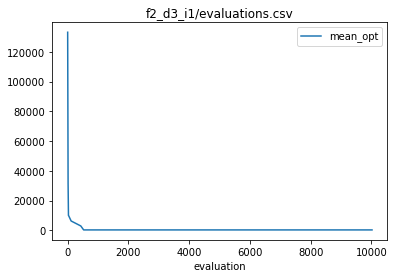

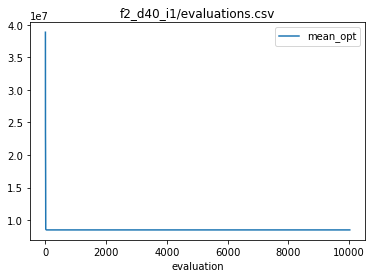

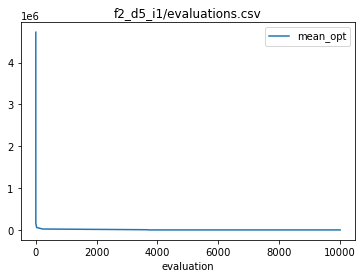

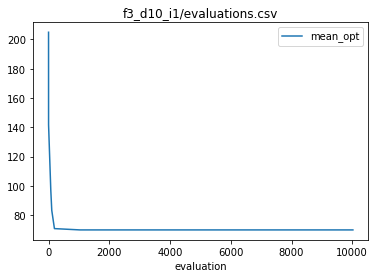

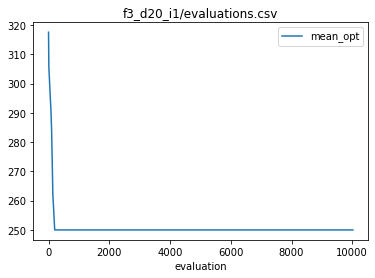

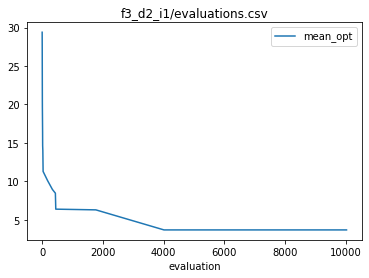

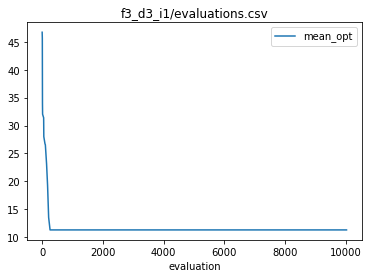

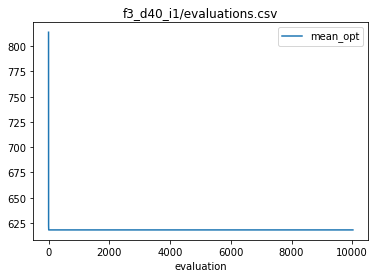

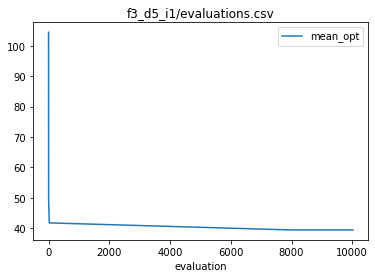

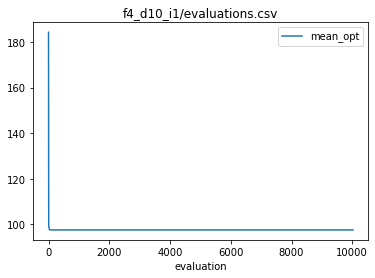

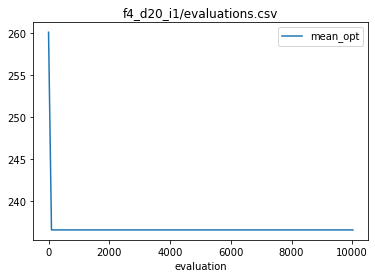

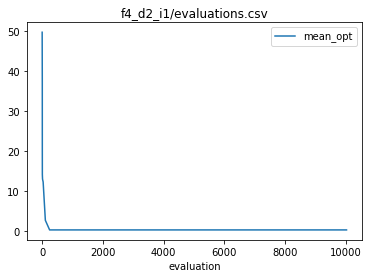

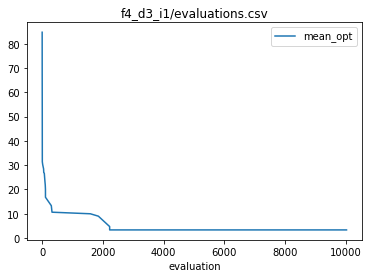

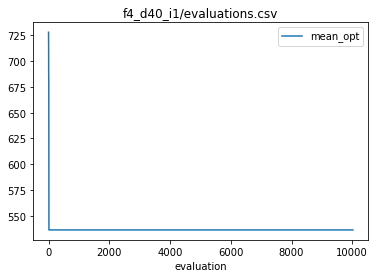

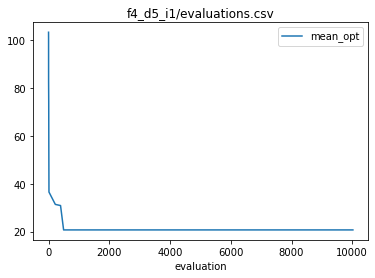

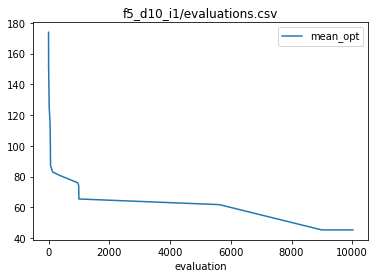

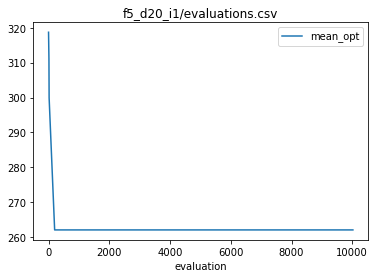

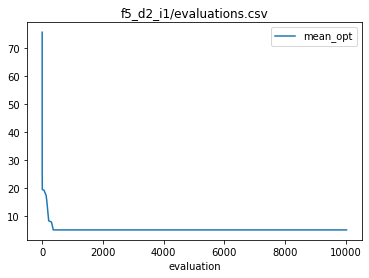

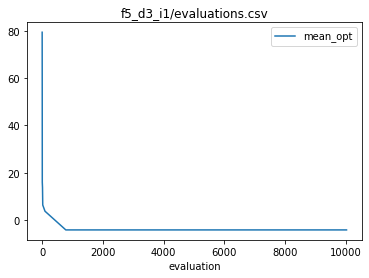

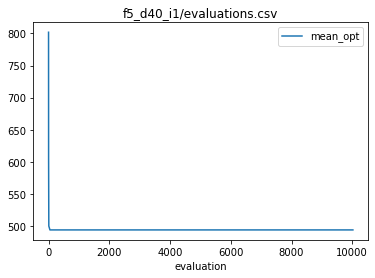

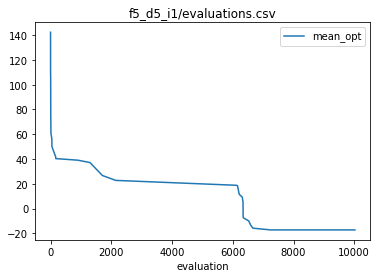

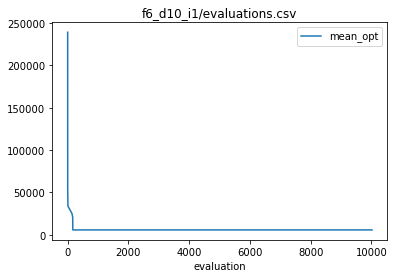

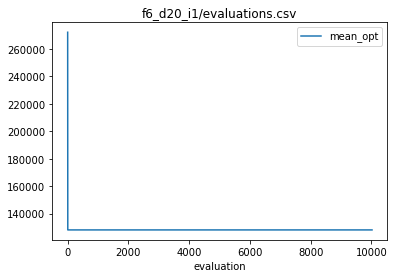

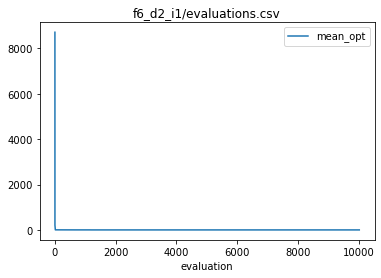

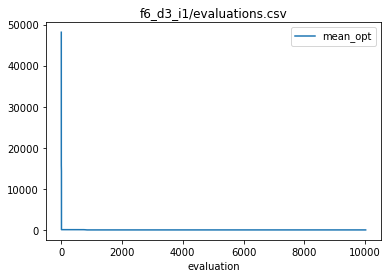

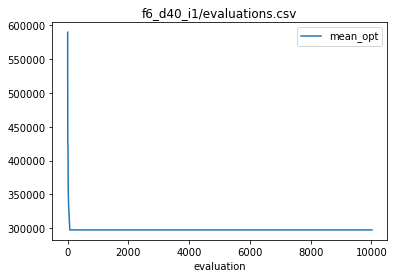

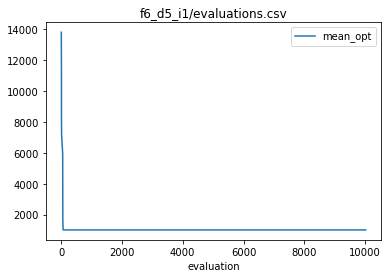

In [16]:
for key in stats_eval_dict:
    stats_eval_dict[key].plot(y="mean_opt")
    plt.title(key)